In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/dcellucc/anaconda3/envs/py37/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/dcellucc/anaconda3/envs/py37/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


M3-X (Projet Lattice Material):

<img src="./assets/visijet_properties.png">

In [2]:
widths = [600,500,400,300,250]

for i in range(len(widths)):
    widths[i] = widths[i]/0.6504*0.8167

In [3]:
m3x_str = 49e6
m3x_mod = 2168e6

relden = 0.1
strk = 1.0/6.0
stfk = 1.0/9.0

hi_E_st = relden*stfk*m3x_mod
lo_E_st = hi_E_st*0.7

hi_s_st = relden*strk*m3x_str
lo_s_st = hi_s_st*0.7

sw = [600,500,400,300,250]
sampledims = [0.058,0.048,0.038,0.028,0.024]
sheights = [0.062,0.052,0.042,0.032,0.048]

hi_ex_force = []
lo_ex_force = []
hi_ex_disp = []
lo_ex_disp = []
widths = []

for i,sdim in enumerate(sampledims):
    widths.append(sw[i]/0.8)
    thief = sdim*sdim*hi_s_st
    tloef = sdim*sdim*lo_s_st
    hi_ex_force.append(thief)
    lo_ex_force.append(tloef)
    hi_ex_disp.append(hi_s_st/lo_E_st*sdim*1000)
    lo_ex_disp.append(lo_s_st/hi_E_st*sdim*1000)

for i in range(len(sampledims)):
    print("Strut-Width {0:0.0f} will exert a force between {1:4.0f} and {2:4.0f} N and will displace between {3:4.3f} and {4:4.3f} mm".format(widths[i],lo_ex_force[i],hi_ex_force[i],lo_ex_disp[i],hi_ex_disp[i]))
    
print(hi_E_st)
#print(hi_ex_force)    
#print(lo_ex_force)
#print(hi_ex_disp) 
#print(lo_ex_disp) 


Strut-Width 750 will exert a force between 1923 and 2747 N and will displace between 1.376 and 2.809 mm
Strut-Width 625 will exert a force between 1317 and 1882 N and will displace between 1.139 and 2.325 mm
Strut-Width 500 will exert a force between  825 and 1179 N and will displace between 0.902 and 1.840 mm
Strut-Width 375 will exert a force between  448 and  640 N and will displace between 0.664 and 1.356 mm
Strut-Width 312 will exert a force between  329 and  470 N and will displace between 0.570 and 1.162 mm
24088888.888888888


Questions: 

What is the best strain rate to pick? What produces the same type of loading as the sample size is reduced? (plastics respond differently to different strain rate)

Ways of testing different strain rates: 
Elastic cycles at different rates. 



In [4]:
st_rates = [0.01,0.025,0.05]

tot_time = 0
for i in range(len(sampledims)):
    for st_rate in st_rates:
        print(hi_ex_disp[i]*0.5)
        tot_time = tot_time + lo_ex_disp[i]*0.5/st_rate

tot_time

1.404520295202952
1.404520295202952
1.404520295202952
1.1623616236162364
1.1623616236162364
1.1623616236162364
0.9202029520295204
0.9202029520295204
0.9202029520295204
0.6780442804428044
0.6780442804428044
0.6780442804428044
0.5811808118081182
0.5811808118081182
0.5811808118081182


372.11070110701104

### Experiment Notes

Material was below both worst-case expected strength and stiffness (for a 0.1 linear scaling CS loaded w/ k = 0.2)

Changed the parameters after the first 600 micron voxel test in response to measurements.

50 um/s and 0.5 maximum expected displacement.

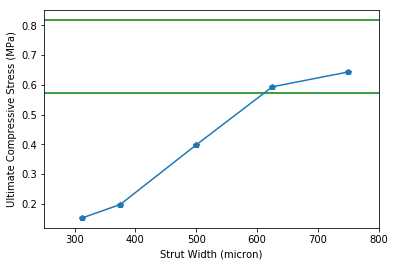

In [5]:
nfail = [(2250+2160+2080)/3.0/0.058/0.058, (1500+1400+1200)/3.0/0.048/0.048, 
         (500+600+660+540)/4.0/0.038/0.038, (170+140)/2.0/0.028/0.028,
         (85+91)/2.0/0.024/0.024]
nfail = list(map(lambda x: x/1.0e6, nfail))

plt.axhline(y=hi_s_st/1e6,color='g')
plt.axhline(y=lo_s_st/1e6,color='g')

plt.plot(widths,nfail,'p-')
plt.xlabel("Strut Width (micron)")
plt.ylabel("Ultimate Compressive Stress (MPa)")
plt.xlim([250,800])
plt.show()

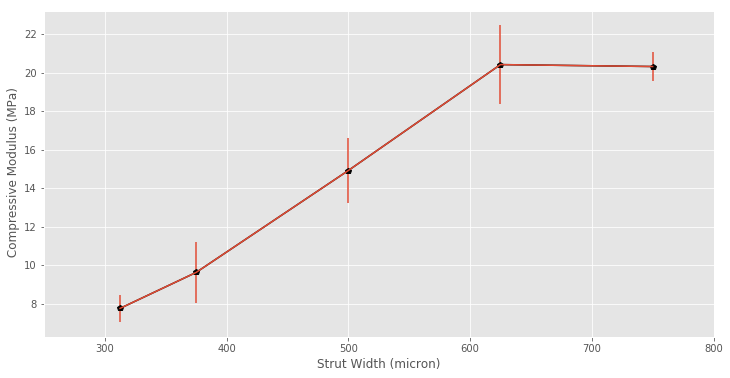

In [42]:
meas_mod_vals = [[19.745,20.841,20.285,20.152,20.562],
                 [20.094,21.792,19.366],
                 [15.1221,16,15.991,13.682,13.983,14.992,14.622],
                 [10.217,9.148,9.709,10.437,10.834,8.331,8.698,9.206,9.978],
                 [7.7256,8.253,7.255,7.766]]

meas_E_mean = []
meas_E_stdev = []

for samples in meas_mod_vals:
    meas_E_mean.append(sum(samples)/len(samples))
    meas_E_stdev.append(np.std(samples)*2)
    

plt.style.use('ggplot')

f, (ax1) = plt.subplots(1, 1)

f.set_size_inches(12, 6)
ax1.plot(widths,meas_E_mean,'p-',color='k')
ax1.errorbar(widths,meas_E_mean,yerr=meas_E_stdev)
#ax1.set_title("Strut Width Testing of 10x10x10 DSchwarz Samples\n")
ax1.set_xlabel("Strut Width (micron)")
ax1.set_ylabel(" Compressive Modulus (MPa)")
#axhline(y=hi_E_st/1e6,color='g')
#axhline(y=lo_E_st/1e6,color='g')
#text(280,15.5,"Minimum ex. Mod.",)
#text(280,23,"Maximum ex. Mod.",)
ax1.set_xlim([250,800])
plt.savefig("Strut_Width.png")

NameError: name 'dsch_test_4' is not defined

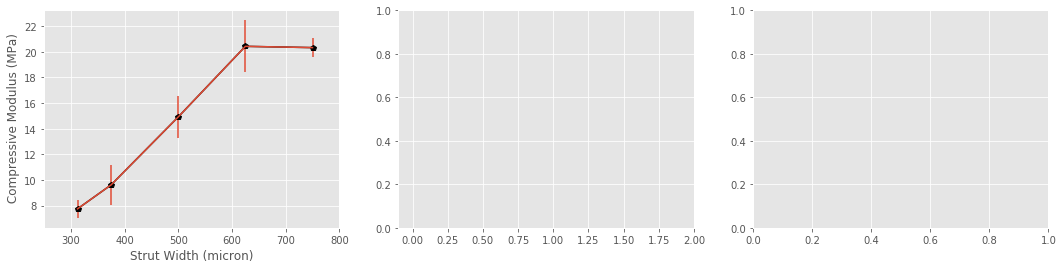

In [6]:
ax2.set_xlim((-0.1,2.0))
#ax2.set_title("0.04 Relative Density 8x8x8 DSchwarz Sample\n")
dsch_test_4 = dsch_test_4[dsch_test_4.Extension.astype(float).values<1.53]
p1 = ax2.plot(dsch_test_4.Extension.astype(float).values,dsch_test_4.Load.astype(float).values)
p2 = ax2.plot(dsch_test_3.Extension.astype(float).values,dsch_test_3.Load.astype(float).values)
ax2.set_xlabel("Extension (mm)")
ax2.set_ylabel("Load (N)")

anvilheights = [0.05175,0.07418,0.098,0.072,0.086]
reldens = [0.028,0.035,0.05,0.1]
meas_mod_vals = [[10.25,10.35,10.17,10.49],
                 [14.46,13.40,13.48,14.57], 
                 [20.62,20.86,21.12,21.11,
                  20.64,20.81,19.65,19.6], 
                 [48.51,47.06,53.06,49.32,51.76,
                  52.81,51.08,49.28,52.16,
                  51.16,54.34,50.63]]



meas_E_mean = []
meas_E_stdev = []
reldens_full = []



for i,samples in enumerate(meas_mod_vals):
    meas_E_mean.append(sum(samples)/len(samples))
    meas_E_stdev.append(np.std(samples)*2)
    reldens_full.append([reldens[i]]*len(samples))

meas_mod_vals_flat = np.hstack(meas_mod_vals)
reldens_full = np.hstack(reldens_full)
#print meas_E_mean

#for i in range(len(meas_E_mean)):
#    meas_E_mean[i] = meas_E_mean[i]*(anvilheights[i]-0.0058)/anvilheights[i]
    
testrdens = [0.027, 0.1]
lincs_up = [(meas_E_mean[-1]+meas_E_stdev[-1])*0.27,(meas_E_mean[-1]+meas_E_stdev[-1])]
thcs_up = [(meas_E_mean[-1]+meas_E_stdev[-1])*(0.27)**2,(meas_E_mean[-1]+meas_E_stdev[-1])]
lincs_dw = [(meas_E_mean[-1]-meas_E_stdev[-1])*0.27,(meas_E_mean[-1]-meas_E_stdev[-1])]
thcs_dw = [(meas_E_mean[-1]-meas_E_stdev[-1])*(0.27)**2,(meas_E_mean[-1]-meas_E_stdev[-1])]
    
log_reldens_full = np.array(list(map(np.log,reldens_full)))/np.log(10)
log_meas_mod_vals_flat = np.array(list(map(np.log,meas_mod_vals_flat)))/np.log(10)

fitvals= np.polyfit(log_reldens_full,log_meas_mod_vals_flat,1)


ax3.plot([0.025,0.11],[0.025**fitvals[0]*10**fitvals[1],0.11**fitvals[0]*10**fitvals[1]],'k--',linewidth=1)
ax3.errorbar(reldens,meas_E_mean,yerr=meas_E_stdev,linestyle=" ",color='k',linewidth=1)
#ax3.plot(reldens_full, meas_mod_vals_flat,'k.')
ax3.plot(reldens, meas_E_mean, 'k*')
ax3.fill_between(testrdens,lincs_up,lincs_dw,facecolor=
matplotlib.colors.to_rgba(p1[0].get_color(),alpha=0.5),edgecolor=(0,0,0,0))
ax3.fill_between(testrdens,thcs_up,thcs_dw,facecolor=
matplotlib.colors.to_rgba(p2[0].get_color(),alpha=0.5),edgecolor=(0,0,0,0))

#reldens.append(0.027)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel("Relative Density")
ax3.set_ylabel(" Compressive Modulus (MPa)")
#axhline(y=hi_E_st/1e6,color='g')
#axhline(y=lo_E_st/1e6,color='g')
ax3.text(0.03,25,"Linear Scaling",rotation=29)
ax3.text(0.0325,13,"Quadratic Scaling",rotation=47)
ax3.text(0.024,10.5,"1.25",rotation=32.5)
#text(280,23,"Maximum ex. Mod.",)
ax3.set_xlim([0.02,0.12])
ax3.set_ylim([5,60])
#plt.title("Measured Young's Modulus for 10x10x10 DSchwarz, 620 SW")
plt.show()


plt.show()

In [24]:
dsch_test_4 = open("RawData/LOT_20160622/20160711_DSCH_0.04rd_0.62sw/20160711_DSCH_.is_ccyclic_RawData/Specimen_RawData_4.csv")
dsch_test_4 = pd.read_csv(dsch_test_4,header=8)
dsch_test_4 = dsch_test_4.drop([0])



dsch_test_3 = open("RawData/LOT_20160622/20160711_DSCH_0.04rd_0.62sw/20160711_DSCH_.is_ccyclic_RawData/Specimen_RawData_3.csv")
dsch_test_3 = pd.read_csv(dsch_test_3,header=8)
dsch_test_3 = dsch_test_3.drop([0])



[1.25403964 2.95744922]
[1.22489655 2.90542062]


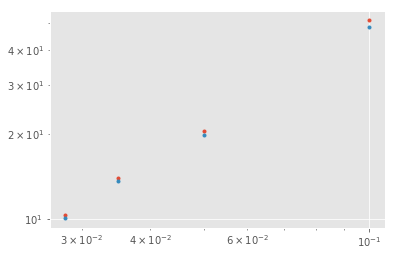

In [36]:


anvilheights = [0.05175,0.07418,0.098,0.072,0.086]
reldens = [0.028,0.035,0.05,0.1]
meas_mod_vals = [[10.25,10.35,10.17,10.49],
                 [14.46,13.40,13.48,14.57], 
                 [20.62,20.86,21.12,21.11,
                  20.64,20.81,19.65,19.6], 
                 [48.51,47.06,53.06,49.32,51.76,
                  52.81,51.08,49.28,52.16,
                  51.16,54.34,50.63]]



meas_E_cc = np.flip(np.array([48.43, 19.84, 13.58, 10.05]))

meas_E_mean = []
meas_E_stdev = []
reldens_full = []



for i,samples in enumerate(meas_mod_vals):
    meas_E_mean.append(sum(samples)/len(samples))
    meas_E_stdev.append(np.std(samples)*2)
    reldens_full.append([reldens[i]]*len(samples))

meas_mod_vals_flat = np.hstack(meas_mod_vals)
reldens_full = np.hstack(reldens_full)

#for i in range(len(meas_E_mean)):
#    meas_E_mean[i] = meas_E_mean[i]*(anvilheights[i]-0.0058)/anvilheights[i]
    
testrdens = [0.027, 0.1]
lincs_up = [(meas_E_mean[-1]+meas_E_stdev[-1])*0.27,(meas_E_mean[-1]+meas_E_stdev[-1])]
thcs_up = [(meas_E_mean[-1]+meas_E_stdev[-1])*(0.27)**2,(meas_E_mean[-1]+meas_E_stdev[-1])]
lincs_dw = [(meas_E_mean[-1]-meas_E_stdev[-1])*0.27,(meas_E_mean[-1]-meas_E_stdev[-1])]
thcs_dw = [(meas_E_mean[-1]-meas_E_stdev[-1])*(0.27)**2,(meas_E_mean[-1]-meas_E_stdev[-1])]


log_reldens_full = np.log10(reldens_full)
log_meas_mod_vals_flat = np.log10(meas_mod_vals_flat)

fitvals= np.polyfit(log_reldens_full,log_meas_mod_vals_flat,1)
print(fitvals)
fitvals= np.polyfit(np.log10(reldens),np.log10(meas_E_cc),1)
print(fitvals)

f = plt.gcf()
f.set_size_inches(6, 4)
plt.plot(reldens,meas_E_mean,'.')
plt.plot(reldens,meas_E_cc,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [23]:
import matplotlib

matplotlib.colors.to_rgba(p1[0].get_color(),alpha=0.5)

NameError: name 'p1' is not defined